# **Early Detection of Alzheimer’s Disease Using MRI Images and Transfer Learning**

**Author:** Manogna Rayasam  
**Course Name:** Introduction to Data Analysis and Machine Learning (DATA 602)  
**Instructor:** Devin Fensterheim  
**University:** University of Maryland, Baltimore County

This notebook showcases the application of transfer learning techniques to classify MRI images for the early detection of Alzheimer’s Disease (AD). This project will serve as a comprehensive study in both medical image analysis and the use of machine learning techniques, particularly in the healthcare sector. Through the utilization of the Alzheimer_MRI Disease Classification Dataset, the project demonstrates the potential of AI to assist in the early detection and management of neurodegenerative disorders such as Alzheimer's Disease.

**Data Source:** https://huggingface.co/datasets/Falah/Alzheimer_MRI

**Project on Google Colab:** https://colab.research.google.com/drive/1oH44u5vuZGY_bcSvRXyyMNRARjsRYVjw?usp=sharing


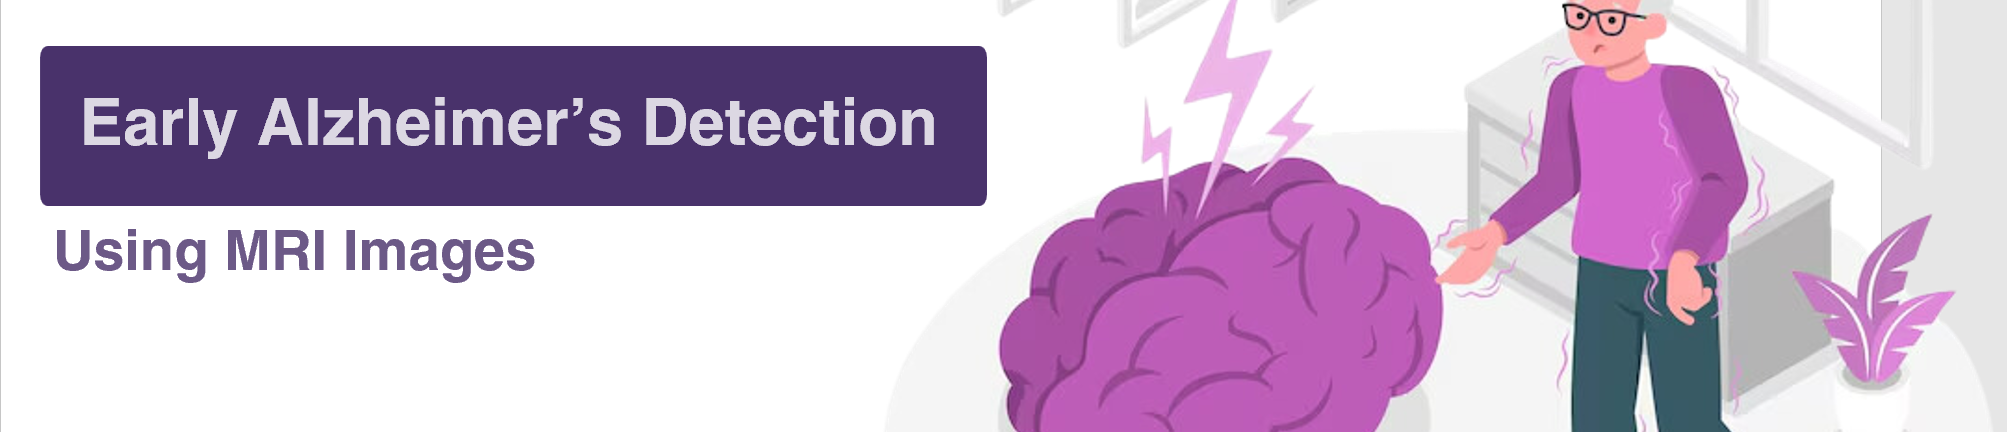

## **Installing Required Libraries**

In this section, we will install the necessary libraries and dependencies for the project. These libraries will support our machine learning model training, data preprocessing, and image analysis tasks.

In [ ]:
!pip install torch torchvision opencv-python scikit-learn matplotlib
!pip install datasets
!pip install datasets scikit-learn
!pip install datasets transformers pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


## **Importing Necessary Libraries**

In this section, we import all the required libraries for data processing (e.g., pandas, numpy), machine learning (torch, scikit-learn), image handling (cv2, PIL), and visualization (matplotlib). It sets up tools for dataset management, model building, and evaluation.


In [ ]:
#Importing Necessary Libraries
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.models import resnet50
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from datasets import Dataset, DatasetDict
from datasets import load_dataset
from sklearn.model_selection import train_test_split
from torch.utils.data import WeightedRandomSampler
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
from torchvision import transforms
from torchvision.models import resnet50
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.utils.class_weight import compute_class_weight
import torch
import torch.nn as nn
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

## **Loading and Inspecting the Dataset**

In this section, we load the Alzheimer's MRI dataset using the Hugging Face `datasets` library, inspects its structure, and prints sample data from the training set. It then saves the training split to a specified directory for later use, confirming the save location.



In [ ]:
# Load the dataset
dataset = load_dataset("Falah/Alzheimer_MRI")
print(dataset)
# Inspect the dataset structure
print(dataset['train'].features)

# Check a few samples from the training set
print(dataset['train'][0])  # Example from the first sample

# Save the Hugging Face dataset to a directory
huggingface_path = "/content/HuggingFaceDataset"

# Save train split
dataset["train"].save_to_disk(huggingface_path)

# Print confirmation
print(f"Hugging Face dataset saved to: {huggingface_path}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.13k [00:00<?, ?B/s]

(…)-00000-of-00001-c08a401c53fe5312.parquet:   0%|          | 0.00/22.6M [00:00<?, ?B/s]

(…)-00000-of-00001-44110b9df98c5585.parquet:   0%|          | 0.00/5.65M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/5120 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1280 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 5120
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1280
    })
})
{'image': Image(mode=None, decode=True, id=None), 'label': ClassLabel(names=['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented'], id=None)}
{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=L size=128x128 at 0x7AC7CEBD9780>, 'label': 2}


Saving the dataset (0/1 shards):   0%|          | 0/5120 [00:00<?, ? examples/s]

Hugging Face dataset saved to: /content/HuggingFaceDataset


## **Dataset Analysis**

This cell analyzes the class distribution in the training dataset. It extracts labels, counts their occurrences using Counter, and visualizes the label distribution with a bar chart, providing insights into class balance or imbalance.

Label Counts: Counter({2: 2566, 3: 1781, 0: 724, 1: 49})


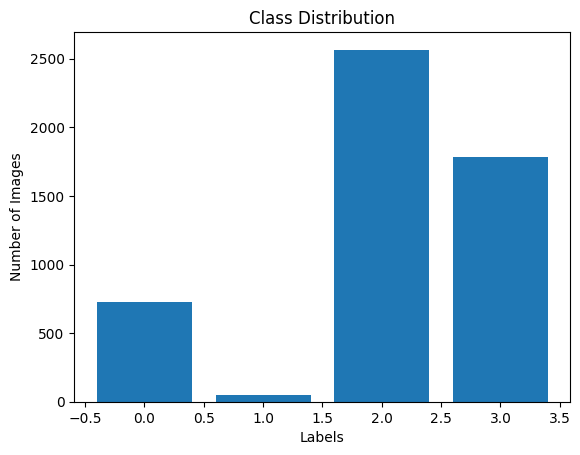

In [ ]:
# analysis of the project

# Extract labels from the 'train' split of the dataset
labels = [example['label'] for example in dataset['train']]

# Count occurrences of each label
label_counts = Counter(labels)

# Display counts
print("Label Counts:", label_counts)

# Visualize the label distribution
plt.bar(label_counts.keys(), label_counts.values())
plt.title("Class Distribution")
plt.xlabel("Labels")
plt.ylabel("Number of Images")
plt.show()


## **Splitting Dataset into Train, Validation, and Test Sets**

This cell splits the training dataset into training and validation subsets using an 80-20 ratio. The updated dataset includes separate splits for training, validation, and testing, ensuring proper data partitioning for model evaluation.

In [ ]:
from datasets import DatasetDict

# Split the 'train' dataset into train and validation subsets
train_test_split = dataset['train'].train_test_split(test_size=0.2, seed=42)

# Ensuring separate train, validation, and test splits
dataset = DatasetDict({
    'train': train_test_split['train'],  # Train data
    'validation': train_test_split['test'],  # Validation data for tuning
    'test': dataset['test']  # Reserved test set for final evaluation
})
# Verify the new splits
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 4096
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 1024
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1280
    })
})


## **Stratified K-Fold Cross-Validation Setup**

This cell implements stratified K-Fold cross-validation to split the dataset into balanced folds, preserving class distributions in each fold. It creates DataLoaders for training and validation datasets in each fold, enabling effective model evaluation.

In [ ]:
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import TensorDataset, DataLoader
import torch

sample_images = np.array([np.array(example['image']) for example in dataset['train']])
labels = np.array([example['label'] for example in dataset['train']])

# Ensure `sample_images` and `labels` are NumPy arrays
sample_images = np.array(sample_images)
labels = np.array(labels)

# Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(sample_images, labels)):
    print(f"Fold {fold+1}")

    # Split dataset into train and validation
    X_train, X_val = sample_images[train_idx], sample_images[val_idx]
    y_train, y_val = labels[train_idx], labels[val_idx]

    # Create DataLoaders
    train_dataset = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).long())
    val_dataset = TensorDataset(torch.tensor(X_val).float(), torch.tensor(y_val).long())
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

    # Debugging: Print dataset sizes
    print(f"Train dataset size: {len(train_dataset)}")
    print(f"Validation dataset size: {len(val_dataset)}")


Fold 1
Train dataset size: 3276
Validation dataset size: 820
Fold 2
Train dataset size: 3277
Validation dataset size: 819
Fold 3
Train dataset size: 3277
Validation dataset size: 819
Fold 4
Train dataset size: 3277
Validation dataset size: 819
Fold 5
Train dataset size: 3277
Validation dataset size: 819


## **Display Dataset Structure**

This cell prints the structure of the dataset object, providing an overview of its splits (e.g., training, validation, and test) and their contents for verification and debugging purposes.

In [ ]:
print(dataset)


DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 4096
    })
    validation: Dataset({
        features: ['image', 'label'],
        num_rows: 1024
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 1280
    })
})


## **Data Augmentation and DataLoader Preparation**

This cell defines a series of data augmentation techniques (e.g., resizing, flipping, rotation, color jitter) to improve model generalization. It converts the Hugging Face dataset into a PyTorch-compatible dataset using a custom CustomDataset class and prepares DataLoaders for training and validation datasets with the specified batch size.

In [ ]:
from datasets import load_dataset
from torchvision.transforms import transforms
from torch.utils.data import DataLoader, Dataset

# Added data augmentation techniques
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 for ResNet50
    transforms.RandomHorizontalFlip(p=0.5),  # Apply horizontal flip
    transforms.RandomRotation(10),  # Rotate by ±10 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Random color jitter
    transforms.Lambda(lambda img: img.convert("RGB")),  # Ensure 3-channel input
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),  # Normalize with ImageNet stats
])



# Convert Hugging Face dataset to PyTorch Dataset
class CustomDataset(Dataset):
    def __init__(self, hf_dataset, transform):
        self.data = hf_dataset
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = self.data[idx]["image"]
        label = self.data[idx]["label"]
        image = self.transform(image)  # Apply transforms to the image
        return image, label

# Update dataset with the new transform
train_dataset = CustomDataset(dataset['train'], transform)
val_dataset = CustomDataset(dataset['validation'], transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Check DataLoaders
print(f"Number of batches in train_loader: {len(train_loader)}")
print(f"Number of batches in val_loader: {len(val_loader)}")

Number of batches in train_loader: 128
Number of batches in val_loader: 32


## **Model Validation Function**

This cell defines a validate_model function to evaluate the model on the validation dataset. It computes the validation loss and accuracy, providing detailed outputs for each batch to debug performance and ensure correctness.

In [ ]:
# Validate the Model
def validate_model(model, val_loader, criterion):
    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for i, (images, labels) in enumerate(val_loader):
            print(f"Batch {i+1}: Images shape: {images.shape}, Labels shape: {labels.shape}")
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            print(f"Batch {i+1}: Loss = {loss.item()}")

            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f"Validation Loss: {val_loss / len(val_loader):.4f}, Accuracy: {val_accuracy:.2f}%")
    return val_loss / len(val_loader), val_accuracy


## **Model Initialization Function**

This cell defines the get_model function, which initializes and returns a pre-trained model (EfficientNet-B0 or ResNet-50) with a modified classification head for the specified number of classes. It supports the option to load pre-trained weights or start from scratch.

In [ ]:
from torchvision.models import efficientnet_b0, resnet50
import torch.nn as nn

def get_model(model_name="efficientnet_b0", num_classes=5, pretrained=True):
    """
    Get a pre-trained model with a modified classification head.

    Args:
        model_name (str): Name of the model to use (e.g., "efficientnet_b0", "resnet50").
        num_classes (int): Number of output classes.
        pretrained (bool): Whether to use a pre-trained model.

    Returns:
        model: A PyTorch model with a customized classification head.
    """
    if model_name == "efficientnet_b0":
        model = efficientnet_b0(weights="IMAGENET1K_V1" if pretrained else None)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    elif model_name == "resnet50":
        model = resnet50(weights="IMAGENET1K_V1" if pretrained else None)
        model.fc = nn.Linear(model.fc.in_features, num_classes)
    else:
        raise ValueError(f"Model {model_name} is not supported. Choose 'efficientnet_b0' or 'resnet50'.")

    return model


## **Training Loop with Early Stopping**

This cell defines the train_model function, which trains the model using the provided data loaders. It integrates features like early stopping, learning rate scheduling, and saving the best model based on validation loss. After training, the best model is loaded for further use.

In [ ]:
def train_model(model, train_loader, val_loader, num_epochs=10, patience=3):
    """
    Train the model with early stopping and learning rate scheduling, and save the best model.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    # Optimizer and loss function
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.1)

    # Early stopping variables
    best_val_loss = float('inf')
    patience_counter = 0

    # File to save the best model
    best_model_path = "best_model.pth"

    print("Starting training...")
    for epoch in range(num_epochs):
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {train_accuracy:.2f}%")

        # Validate the model
        val_loss, val_accuracy = validate_model(model, val_loader, criterion)
        print(f"Validation Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.2f}%")

        # Step the scheduler
        scheduler.step(val_loss)

        # Early stopping logic
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0  # Reset patience counter
            # Save the best model
            torch.save(model.state_dict(), best_model_path)
            print(f"Best model saved at epoch {epoch+1} with validation loss {best_val_loss:.4f}.")
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping triggered.")
                break

    # Load the best model before returning
    model.load_state_dict(torch.load(best_model_path))
    print("Best model loaded.")
    return model


## **K-Fold Cross-Validation**

This cell implements K-Fold cross-validation to train and evaluate the model across multiple dataset splits. It initializes the model for each fold, trains it using the training subset, validates it, and saves the best-performing model. The results are stored and summarized for all folds to assess overall performance.

In [ ]:
from sklearn.model_selection import KFold
import torch
from torch.utils.data import DataLoader, Subset

# Number of folds
k_folds = 5

# Prepare dataset
full_dataset = CustomDataset(dataset['train'], transform)

# Get the number of classes in your dataset
num_classes = dataset['train'].features['label'].num_classes

# Prepare K-Fold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Results dictionary to store metrics
results = {}

# Start K-Fold cross-validation
for fold, (train_idx, val_idx) in enumerate(kf.split(full_dataset)):
    print(f"Fold {fold + 1}/{k_folds}")

    # Convert indices to Python int (from numpy.int64)
    train_idx = train_idx.tolist()
    val_idx = val_idx.tolist()

    # Subset the dataset for train and validation splits
    train_subset = Subset(full_dataset, train_idx)
    val_subset = Subset(full_dataset, val_idx)

    # Create DataLoaders
    train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)

    # Initialize the model
    model = get_model("efficientnet_b0", num_classes=num_classes, pretrained=True)  # Example: EfficientNet-B0

    # Train the model and save the best model
    best_model_path = f"best_model_fold_{fold + 1}.pth"
    trained_model = train_model(model, train_loader, val_loader, num_epochs=10, patience=3)

    # Save the trained model
    torch.save(trained_model.state_dict(), best_model_path)
    print(f"Trained model for fold {fold + 1} saved at: {best_model_path}")

    # Evaluate the model on the validation set
    val_loss, val_accuracy = validate_model(trained_model, val_loader, nn.CrossEntropyLoss())
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # Store results for this fold
    results[fold] = {
        "val_loss": val_loss,
        "val_accuracy": val_accuracy
    }

# Print summary of results
print("\nK-Fold Cross-Validation Results:")
for fold, metrics in results.items():
    print(f"Fold {fold + 1}: Loss = {metrics['val_loss']:.4f}, Accuracy = {metrics['val_accuracy']:.2f}%")


Fold 1/5


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 192MB/s]


Starting training...
Epoch 1/10, Loss: 0.9347, Accuracy: 54.70%
Batch 1: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 1: Loss = 0.8370882272720337
Batch 2: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 2: Loss = 0.7586847543716431
Batch 3: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 3: Loss = 0.7070729732513428
Batch 4: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 4: Loss = 0.7084274888038635
Batch 5: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 5: Loss = 0.9050745368003845
Batch 6: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 6: Loss = 0.8826999068260193
Batch 7: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 7: Loss = 0.9326891899108887
Batch 8: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 8: Lo

<ipython-input-15-3cdf3d0e0970>:68: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))


Batch 1: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 1: Loss = 0.24025188386440277
Batch 2: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 2: Loss = 0.19698597490787506
Batch 3: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 3: Loss = 0.37196043133735657
Batch 4: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 4: Loss = 0.2729506194591522
Batch 5: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 5: Loss = 0.30688053369522095
Batch 6: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 6: Loss = 0.21885159611701965
Batch 7: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 7: Loss = 0.5807098150253296
Batch 8: Images shape: torch.Size([32, 3, 224, 224]), Labels shape: torch.Size([32])
Batch 8: Loss = 0.19413405656814575
Batch 9: Images shape: torch.Size(

In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Path to saved models
model_paths = [f"best_model_fold_{i + 1}.pth" for i in range(5)]

# Number of classes
num_classes = dataset['train'].features['label'].num_classes

# Prepare the test dataset and DataLoader
test_dataset = CustomDataset(dataset['test'], transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load all models
models = []
for path in model_paths:
    model = get_model("efficientnet_b0", num_classes=num_classes, pretrained=False)
    model.load_state_dict(torch.load(path))
    model.eval()  # Set to evaluation mode
    models.append(model)

# Evaluate models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
all_predictions = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        ensemble_outputs = []

        # Collect predictions from all models
        for model in models:
            model = model.to(device)
            outputs = model(images)
            ensemble_outputs.append(outputs)

        # Average the outputs (for ensemble predictions)
        averaged_outputs = torch.mean(torch.stack(ensemble_outputs), dim=0)
        _, predicted = torch.max(averaged_outputs, 1)

        # Collect predictions and true labels
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute metrics
accuracy = accuracy_score(all_labels, all_predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_predictions))



<ipython-input-17-7fd4c1bedf90>:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


Test Accuracy: 94.92%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       172
           1       1.00      0.87      0.93        15
           2       0.96      0.96      0.96       634
           3       0.91      0.96      0.94       459

    accuracy                           0.95      1280
   macro avg       0.97      0.92      0.94      1280
weighted avg       0.95      0.95      0.95      1280



## **Random Forest**


## **Feature Extraction Using Pre-trained EfficientNet**

This cell uses a pre-trained EfficientNet model as a feature extractor by removing its classification head. It extracts deep features from images in the training and test datasets, enabling the use of these features for downstream tasks like classification or clustering.

In [ ]:
from torchvision.models import efficientnet_b0
import torch
from torch.utils.data import DataLoader
from torchvision import transforms

# Define the feature extractor model (EfficientNet without the classification head)
feature_extractor = efficientnet_b0(weights="IMAGENET1K_V1")
feature_extractor.classifier = torch.nn.Identity()  # Remove the classification head
feature_extractor.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
feature_extractor = feature_extractor.to(device)

# DataLoader for training and test datasets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Function to extract features
def extract_features(loader, model):
    features = []
    labels = []
    with torch.no_grad():
        for images, lbls in loader:
            images = images.to(device)
            outputs = model(images)
            features.append(outputs.cpu().numpy())
            labels.append(lbls.numpy())
    return np.concatenate(features), np.concatenate(labels)

# Extract features for training and testing
train_features, train_labels = extract_features(train_loader, feature_extractor)
test_features, test_labels = extract_features(test_loader, feature_extractor)

print("Features extracted successfully!")


Features extracted successfully!


## **Dimensionality Reduction with PCA**

This cell applies Principal Component Analysis (PCA) to reduce the dimensionality of extracted features to 50 components. This step helps in reducing computational complexity while retaining significant information for classification tasks.

In [ ]:
from sklearn.decomposition import PCA

# Reduce dimensionality to 50 components
pca = PCA(n_components=50, random_state=42)
X_train_reduced = pca.fit_transform(train_features)
X_test_reduced = pca.transform(test_features)

print("Dimensionality reduction completed!")


Dimensionality reduction completed!


## **Random Forest Training and Evaluation**

This cell trains a Random Forest classifier on the reduced features with balanced class weights to handle class imbalance. It evaluates the model on the test set, generating a classification report with detailed performance metrics.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train Random Forest with class weights
rf_model = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
rf_model.fit(X_train_reduced, train_labels)

# Evaluate Random Forest
rf_predictions = rf_model.predict(X_test_reduced)
print("Random Forest Classification Report:")
print(classification_report(test_labels, rf_predictions))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.03      0.06       172
           1       0.00      0.00      0.00        15
           2       0.56      0.93      0.70       634
           3       0.58      0.29      0.39       459

    accuracy                           0.57      1280
   macro avg       0.49      0.31      0.29      1280
weighted avg       0.60      0.57      0.49      1280



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Hyperparameter Tuning for Random Forest**

This cell performs a grid search to optimize the hyperparameters of the Random Forest classifier, such as the number of estimators, maximum depth, and minimum samples split. It identifies the best parameters and evaluates the optimized model, providing a detailed classification repor

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}

# Grid search
grid_rf = GridSearchCV(RandomForestClassifier(class_weight="balanced", random_state=42),
                       param_grid_rf, cv=3, scoring="f1_weighted")
grid_rf.fit(X_train_reduced, train_labels)

# Best parameters and evaluation
print("Best parameters for Random Forest:", grid_rf.best_params_)
best_rf_model = grid_rf.best_estimator_
rf_predictions = best_rf_model.predict(X_test_reduced)
print("Optimized Random Forest Classification Report:")
print(classification_report(test_labels, rf_predictions))


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Optimized Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.17      0.25       172
           1       0.00      0.00      0.00        15
           2       0.63      0.79      0.70       634
           3       0.51      0.48      0.49       459

    accuracy                           0.59      1280
   macro avg       0.41      0.36      0.36      1280
weighted avg       0.56      0.59      0.56      1280



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **Support Vector Machine (SVM)**

**Training and Evaluating Support Vector Machine (SVM)**

In this section, we train and evaluate a **Support Vector Machine (SVM)** model for classifying the MRI data. SVM is a powerful supervised learning algorithm for classification tasks, especially useful for high-dimensional data. We apply the SVM with an RBF kernel and handle class imbalance using balanced class weights.



In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Train SVM with balanced class weights
svm_model = make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1.0, gamma="scale", class_weight="balanced"))
svm_model.fit(X_train_reduced, train_labels)

# Evaluate SVM
svm_predictions = svm_model.predict(X_test_reduced)
print("SVM Classification Report:")
print(classification_report(test_labels, svm_predictions))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.57      0.48       172
           1       1.00      0.33      0.50        15
           2       0.76      0.67      0.71       634
           3       0.56      0.59      0.57       459

    accuracy                           0.62      1280
   macro avg       0.68      0.54      0.56      1280
weighted avg       0.64      0.62      0.63      1280



## **SVM Training and Evaluation**

**Hyperparameter Tuning for Support Vector Machine (SVM) with Grid Search**


This cell trains a Support Vector Machine (SVM) classifier with an RBF kernel and balanced class weights, using a pipeline with standard scaling. It evaluates the model on the test dataset and provides a classification report with performance metrics.

we perform **hyperparameter tuning** for the SVM model using **Grid Search**. Grid Search is an exhaustive search method to find the optimal combination of hyperparameters for the model. We use **F1-score** (weighted) as the evaluation metric, which is particularly useful for imbalanced datasets.


In [ ]:
# Define parameter grid for SVM
param_grid_svm = {
    "svc__C": [0.1, 1, 10],
    "svc__gamma": ["scale", 0.001, 0.01, 0.1],
}

# Grid search
grid_svm = GridSearchCV(make_pipeline(StandardScaler(), SVC(kernel="rbf", class_weight="balanced")),
                        param_grid_svm, cv=3, scoring="f1_weighted")
grid_svm.fit(X_train_reduced, train_labels)

# Best parameters and evaluation
print("Best parameters for SVM:", grid_svm.best_params_)
best_svm_model = grid_svm.best_estimator_
svm_predictions = best_svm_model.predict(X_test_reduced)
print("Optimized SVM Classification Report:")
print(classification_report(test_labels, svm_predictions))


Best parameters for SVM: {'svc__C': 10, 'svc__gamma': 'scale'}
Optimized SVM Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.47      0.53       172
           1       1.00      0.27      0.42        15
           2       0.74      0.77      0.75       634
           3       0.61      0.64      0.62       459

    accuracy                           0.68      1280
   macro avg       0.74      0.54      0.58      1280
weighted avg       0.68      0.68      0.67      1280



## **Ensemble Model Prediction and Probability Aggregation**

This cell evaluates multiple models in an ensemble by averaging their predictions. It calculates the softmax probabilities for each class and stores the true labels and predicted probabilities for further analysis, ensuring models are in evaluation mode throughout.

we make predictions using an **ensemble of models**. Each model in the ensemble provides predictions for the test set, and the final prediction is obtained by averaging the outputs. Additionally, we compute the predicted class probabilities for each image in the test set using **softmax**.


In [ ]:
import torch
import numpy as np

# Ensure all models are in evaluation mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
for model in models:
    model.eval()
    model.to(device)

# Initialize lists for true labels and probabilities
all_labels = []
all_probabilities = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)

        # Get predictions from all models in the ensemble
        ensemble_outputs = []
        for model in models:
            outputs = model(images)
            ensemble_outputs.append(outputs)

        # Average the predictions from all models
        averaged_outputs = torch.mean(torch.stack(ensemble_outputs), dim=0)
        probabilities = torch.nn.functional.softmax(averaged_outputs, dim=1).cpu().numpy()

        # Append true labels and probabilities
        all_labels.extend(labels.numpy())
        all_probabilities.extend(probabilities)

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_probabilities = np.array(all_probabilities)



## **Log Loss Calculation**

This cell computes the log loss for the test dataset using the true labels and predicted probabilities from the ensemble. Log loss measures the model's predictive uncertainty, with lower values indicating better performance.

In [ ]:
from sklearn.metrics import log_loss

# Define all class labels
all_classes = [0, 1, 2, 3]  # Adjust based on your dataset

# Compute log loss
test_loss = log_loss(all_labels, all_probabilities, labels=all_classes)
print(f"Test Loss: {test_loss:.4f}")


Test Loss: 0.1481


## **Plot ROC Curves for All Classes**

## **ROC Curve and AUC Calculation**

This cell computes and plots the Receiver Operating Characteristic (ROC) curve for each class in the dataset. It calculates the False Positive Rate (FPR), True Positive Rate (TPR), and Area Under the Curve (AUC) for each class, providing insights into the model's classification performance.

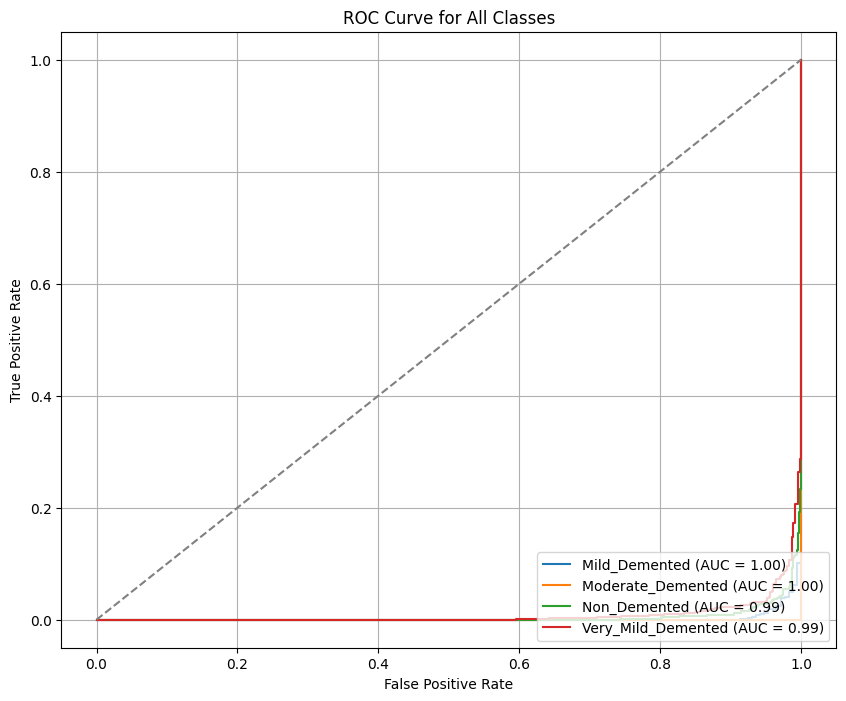

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Define all possible classes
all_classes = [0, 1, 2, 3]  # Adjust this based on your dataset's class labels

# Convert true labels to one-hot encoding
y_true_one_hot = label_binarize(all_labels, classes=all_classes)



# Class names for the labels
classes = ["Mild_Demented", "Moderate_Demented", "Non_Demented", "Very_Mild_Demented"]

# Plot ROC curve
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(classes):
    # Compute FPR, TPR, and AUC for each class
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], all_probabilities[:, i])
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the class
    plt.plot(tpr, fpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

# Plot diagonal for reference
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.title("ROC Curve for All Classes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()



## **Heatmap of Validation Metrics Across Folds with a Heatmap**

This cell visualizes the validation loss and accuracy for each fold during cross-validation using a heatmap. It provides a clear, comparative overview of model performance across all folds.

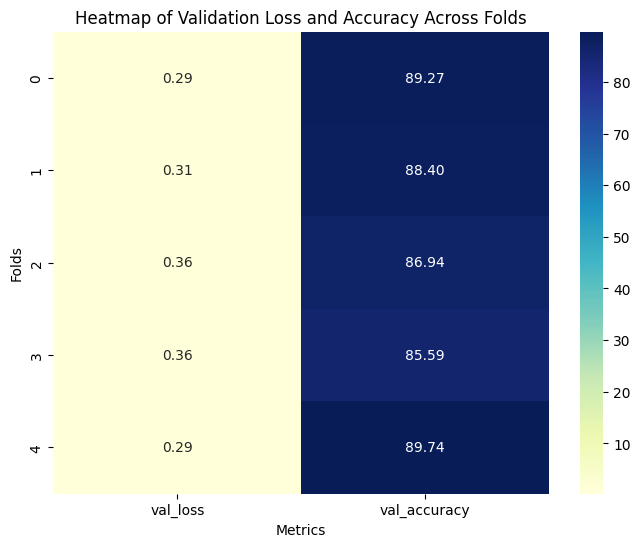

In [ ]:
import seaborn as sns
fold_metrics = pd.DataFrame.from_dict(results, orient='index')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fold_metrics, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Heatmap of Validation Loss and Accuracy Across Folds")
plt.xlabel("Metrics")
plt.ylabel("Folds")
plt.show()


## **Bar Chart for Fold Performance Metrics**

This cell generates a bar chart to compare validation loss and accuracy across different folds during cross-validation. It includes annotations for each bar, highlighting performance metrics, and enhances readability with gridlines and labels.

<Figure size 1000x600 with 0 Axes>

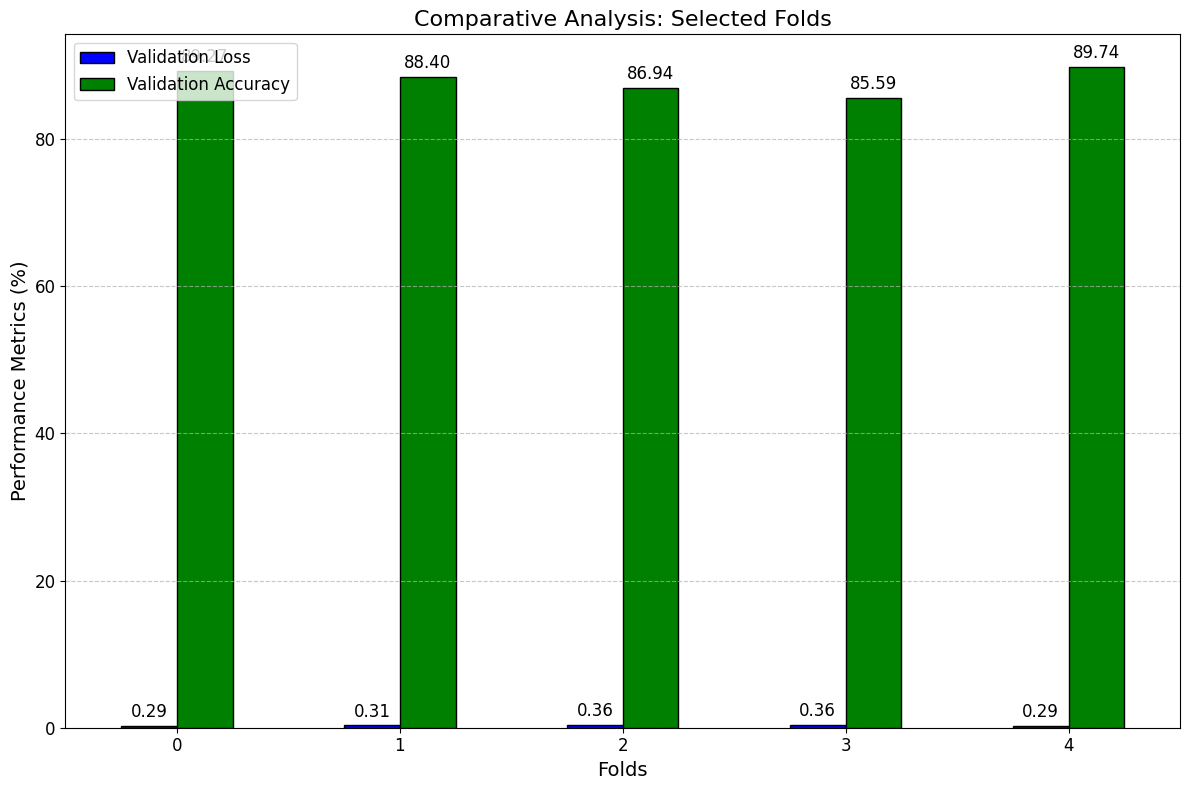

In [ ]:
import seaborn as sns
# Plot improved bar chart
plt.figure(figsize=(10, 6))
ax = fold_metrics.plot(kind="bar", figsize=(12, 8), color=["blue", "green"], edgecolor="black")

# Add labels, title, and legend
plt.title("Comparative Analysis: Selected Folds", fontsize=16)
plt.ylabel("Performance Metrics (%)", fontsize=14)
plt.xlabel("Folds", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(["Validation Loss", "Validation Accuracy"], fontsize=12, loc="upper left")

# Annotate bars with values
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

# Display grid for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## **Model Evaluation with Ensemble Predictions For CNN**

This cell evaluates the **ensemble of models** **bold text** on the test dataset. It loads saved models from each fold, performs predictions using ensemble averaging, and computes overall accuracy and a detailed classification report to assess performance.

In [ ]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Path to saved models
model_paths = [f"best_model_fold_{i + 1}.pth" for i in range(5)]

# Number of classes
num_classes = dataset['train'].features['label'].num_classes

# Prepare the test dataset and DataLoader
test_dataset = CustomDataset(dataset['test'], transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Load all models
models = []
for path in model_paths:
    model = get_model("efficientnet_b0", num_classes=num_classes, pretrained=False)
    model.load_state_dict(torch.load(path))
    model.eval()  # Set to evaluation mode
    models.append(model)

# Evaluate models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
all_predictions = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        ensemble_outputs = []

        # Collect predictions from all models
        for model in models:
            model = model.to(device)
            outputs = model(images)
            ensemble_outputs.append(outputs)

        # Average the outputs (for ensemble predictions)
        averaged_outputs = torch.mean(torch.stack(ensemble_outputs), dim=0)
        _, predicted = torch.max(averaged_outputs, 1)

        # Collect predictions and true labels
        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute metrics
accuracy = accuracy_score(all_labels, all_predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(all_labels, all_predictions))



<ipython-input-17-7fd4c1bedf90>:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path))


Test Accuracy: 94.92%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94       172
           1       1.00      0.87      0.93        15
           2       0.96      0.96      0.96       634
           3       0.91      0.96      0.94       459

    accuracy                           0.95      1280
   macro avg       0.97      0.92      0.94      1280
weighted avg       0.95      0.95      0.95      1280



## References and Citations

This project utilizes data and insights from various sources to ensure accuracy and comprehensiveness:

1. **Dataset**: [Alzheimer MRI Dataset](https://huggingface.co/datasets/Falah/Alzheimer_MRI) hosted on Hugging Face.

2. **Course Materials**:
   - Professor Devin Fensterheim's slides and notes from *Introduction to Data Analysis and Machine Learning* (DATA 602).

3. **Clinical Information**:
   - Mayo Clinic Staff. *Diagnosing Alzheimer's: How Alzheimer's is Diagnosed*. Mayo Clinic. Retrieved from [Mayo Clinic](https://www.mayoclinic.org/diseases-conditions/alzheimers-disease/in-depth/alzheimers/art-20048075).

4. **Research Articles**:
   - Sá Diogo, V., Ferreira, H. A., & Prata, D. (2022). *Early diagnosis of Alzheimer’s disease using machine learning: A multi-diagnostic, generalizable approach*. Alzheimer’s Research & Therapy, 14(107). [Read more](https://alzres.biomedcentral.com/articles/10.1186/s13195-022-01047-y).
   - Vlontzou, M. E., et al. (2024). *A comprehensive interpretable machine learning framework for Mild Cognitive Impairment and Alzheimer’s disease diagnosis*. arXiv preprint. [Read more](https://arxiv.org/html/2412.09376v1).

5. **Acknowledgment**:
   - Data preparation references and methodologies based on *Alzheimer’s Disease Neuroimaging Initiative (ADNI)*. Details available at [ADNI Acknowledgement List](https://adni.loni.usc.edu/wp-content/uploads/how_to_apply/ADNI_Acknowledgement_List.pdf).
